In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
# name and age can be related
def get_title(name):
    title_group = {'mr':'Mr','mrs':'Mrs','miss':'Miss','master':'Master','don':'Sir','dona':'Lady', 'rev':'Sir', 'dr':'Officer'
                  ,'mme':'Mrs', 'ms':'Mrs', 'major':'Officer', 'lady':'Lady', 'sir':'Sir', 'mlle':'Miss', 'col':'Officer',
                   'col':'Officer', 'capt':'Officer', 'the countess':'Lady', 'jonkheer':'Sir'}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [3]:
file_location = r"D:/softwares/python_workspace/data/"
test_df = pd.read_csv(file_location + "test.csv", index_col='PassengerId')
train_df = pd.read_csv(file_location + "train.csv", index_col='PassengerId')
test_df['Survived'] = -888
df = pd.concat((test_df, train_df), axis=0)
df['title'] = df.Name.apply(get_title)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [4]:
# we want to check what impact age has on survived.
age_title_median = df.groupby(['title']).Age.transform('median')


In [5]:
df['Age'].fillna(age_title_median,inplace=True)

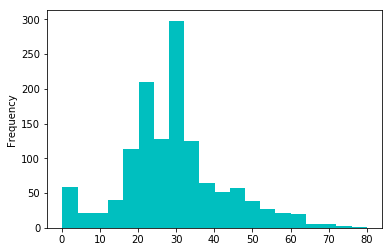

In [6]:
df.Age.plot(kind='hist', bins=20, color='c')

In [7]:
# check if age has anything to do with survival
df['agecategory'] = np.where(df['Age'] >= 18,'Adult','Child')


In [8]:
pd.crosstab(df[df['Survived']!= -888].Survived , df[df['Survived']!= -888].agecategory)

agecategory,Adult,Child
Survived,,
0,495,54
1,279,63


In [9]:
# conclusion :- children had a better chance to survive the disaster
# next :- use cabin location and then use family size to calculate

In [10]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [11]:
pd.crosstab(df[df['Survived'] != -888].Survived, df[df['Survived'] != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [12]:
df[df['FamilySize'] ==11]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,title,agecategory,FamilySize
PassengerId,,,,,,,,,,,,,,
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,Adult,11
1252,14.5,NaN,S,69.55,"Sage, Master. William Henry",2,3,male,8,-888,CA. 2343,Master,Child,11
1257,35.0,NaN,S,69.55,"Sage, Mrs. John (Annie Bullen)",9,3,female,1,-888,CA. 2343,Mrs,Adult,11
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,Adult,11


In [13]:
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [14]:
df[df['Cabin'] == 'T'] = np.nan

In [15]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
    

In [16]:
df['Deck'] = df.Cabin.map(get_deck)

In [17]:
pd.crosstab(df[df['Survived'] != -888].Survived, df[df['Survived'] != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,481
1.0,7,35,35,25,24,8,2,206


In [18]:
# feature encoding
# 1. binary encoding
# 2. one hot encoding
# binary encoding
df['isMale'] = np.where(df['Sex'] == 'male',1,0)

In [22]:
# columns Deck, Pclass, Title, AgeState
# df.info()
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')
df = pd.get_dummies(df,columns=['Deck', 'Pclass','title', 'Fare_Bin', 'Embarked','AgeState'])

In [24]:
# df.info()
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 33 columns):
Survived              1308 non-null float64
Age                   1308 non-null float64
Fare                  1307 non-null float64
agecategory           1308 non-null object
FamilySize            1308 non-null float64
isMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1.0            1309 non-null uint8
Pclass_2.0            1309 non-null uint8
Pclass_3.0            1309 non-null uint8
title_Lady            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
t